In [1]:
import pandas as pd

# Đọc file txt
dfnn = pd.read_csv("AMZN.txt", sep="\t", header=None)

# Đặt tên cho các cột
dfnn.columns = ["date", "open price", "high price", "low price", "close price", "adjusted close price", "volume"]

# Chuyển đổi cột 'date' thành định dạng datetime
dfnn["date"] = pd.to_datetime(dfnn["date"])

# Hiển thị dữ liệu
# print(df.head())
dfnn

,date,open price,high price,low price,close price,adjusted close price,volume
0,2022-12-30,-0.002138,-0.012592,-0.001544,-0.020314,-0.180000,62401200.0
1,2022-12-29,0.028844,0.012833,0.033366,0.008922,2.360001,54995900.0
2,2022-12-28,-0.014692,-0.002890,0.005299,-0.016257,-1.220001,58228600.0
3,2022-12-27,-0.025924,-0.003284,0.001173,-0.026393,-2.209999,57284000.0
4,2022-12-23,0.017425,-0.006445,0.023750,-0.010264,1.459999,57433700.0
...,...,...,...,...,...,...,...
751,2020-01-08,-0.007809,-0.004625,0.002171,-0.010709,-0.744499,70160000.0
752,2020-01-07,0.002092,0.000851,0.005786,-0.005697,0.199005,80898000.0
753,2020-01-06,0.014886,-0.007984,0.015318,-0.007984,1.395500,81236000.0
754,2020-01-03,-0.012139,-0.017655,-0.006222,-0.017655,-1.152000,75288000.0


In [1]:
ff= [-0.012139	-0.017655	-0.006222	-0.017655	-1.152000]

In [2]:
import numpy as np

# Danh sách a
a = np.array([93.224998, 94.309998, 93.224998, 93.748497, 93.748497])

# Thực hiện phép chia và trừ 1
b = a / 94.900497 - 1
b

array([-0.01765532, -0.0062223 , -0.01765532, -0.01213903, -0.01213903])

In [2]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv("AMZN.csv")  # Thay "data.csv" bằng đường dẫn file của bạn

# Chuyển đổi cột 'date' thành định dạng datetime
df["Date"] = pd.to_datetime(df["Date"])

df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000
...,...,...,...,...,...,...,...
752,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
753,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
754,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
755,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [6]:
# !pip install matplotlib

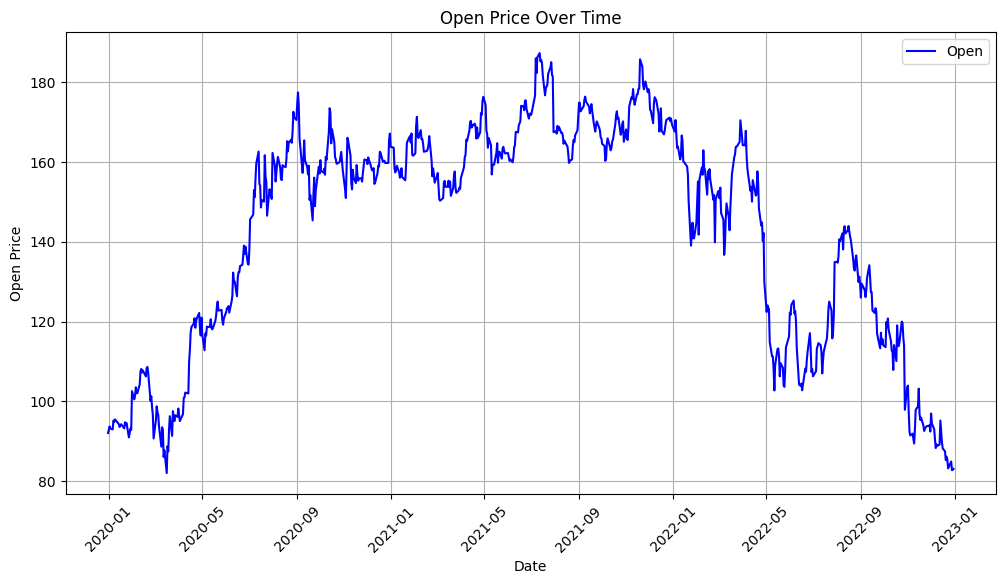

In [3]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Open"], linestyle="-", color="b", label="Open")

# Cài đặt nhãn và tiêu đề
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Open Price Over Time")
plt.xticks(rotation=45)  # Xoay nhãn ngày để dễ nhìn
plt.legend()
plt.grid()

# Hiển thị biểu đồ
plt.show()

In [5]:
import pandas as pd
import pandas_ta as ta  # Sử dụng pandas_ta vì dễ cài đặt và tích hợp với pandas
import numpy as np

def calculate_technical_indicators(data):
    """
    Tính toán các chỉ số kỹ thuật phổ biến cho dữ liệu chứng khoán.

    Args:
        data (pandas.DataFrame): DataFrame chứa dữ liệu chứng khoán (Open, High, Low, Close, Volume).
                                 Yêu cầu các cột 'Open', 'High', 'Low', 'Close', 'Volume'.

    Returns:
        pandas.DataFrame: DataFrame chứa dữ liệu gốc và các chỉ số kỹ thuật.
    """

    # 1. Moving Averages
    data['SMA_5'] = ta.sma(data['Close'], length=5)
    data['EMA_5'] = ta.ema(data['Close'], length=5)

    # 2. MACD
    macd = ta.macd(data['Close'], fast=12, slow=26, signal=9)
    data['MACD'] = macd['MACD_12_26_9']  # Lấy đường MACD
    data['MACD_SIGNAL'] = macd['MACDs_12_26_9']  # Lấy đường tín hiệu
    data['MACD_HIST'] = macd['MACDh_12_26_9']  # Lấy histogram

    # 3. RSI
    data['RSI'] = ta.rsi(data['Close'], length=5)

    # 4. Bollinger Bands
    bbands = ta.bbands(data['Close'], length=20, std=2)
    data['BB_UPPER'] = bbands['BBU_20_2.0']
    data['BB_LOWER'] = bbands['BBL_20_2.0']
    data['BB_MIDDLE'] = bbands['BBM_20_2.0']

    # 5. Volume Indicators (OBV)
    data['OBV'] = ta.obv(data['Close'], data['Volume'])

    # 6. ADX
    adx = ta.adx(data['High'], data['Low'], data['Close'], length=14)
    data['ADX'] = adx['ADX_14']
    data['DMP'] = adx['DMP_14']  # Positive Directional Movement
    data['DMN'] = adx['DMN_14']  # Negative Directional Movement

    return data.round(2)

# Đọc dữ liệu từ file CSV
file_path = 'AMZN.csv'  # Thay 'your_data.csv' bằng đường dẫn thực tế đến file của bạn
try:
    data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn: {file_path}")
    exit()
except Exception as e:
    print(f"Lỗi khi đọc file: {e}")
    exit()

# Kiểm tra xem các cột cần thiết có tồn tại không
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in required_columns:
    if col not in data.columns:
        print(f"Lỗi: Cột '{col}' không tồn tại trong file CSV.")
        exit()

# Tính toán các chỉ số kỹ thuật
data = calculate_technical_indicators(data)
data.head()
# # In ra một vài dòng cuối để kiểm tra
# print(data.tail(10))

# # Lưu kết quả vào file CSV (tùy chọn) 
# data.tail().to_csv('technical_indicators.csv')
# data.to_csv('technical_indicators.csv')


,Open,High,Low,Close,Adj Close,Volume,SMA_5,EMA_5,MACD,MACD_SIGNAL,MACD_HIST,RSI,BB_UPPER,BB_LOWER,BB_MIDDLE,OBV,ADX,DMP,DMN
Date,,,,,,,,,,,,,,,,,,,
2019-12-31,92.10,92.66,91.61,92.39,92.39,50130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50130000.0,NaN,NaN,NaN
2020-01-02,93.75,94.90,93.21,94.90,94.90,80580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130710000.0,NaN,NaN,NaN
2020-01-03,93.22,94.31,93.22,93.75,93.75,75288000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55422000.0,NaN,NaN,NaN
2020-01-06,93.00,95.18,93.00,95.14,95.14,81236000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136658000.0,NaN,NaN,NaN
2020-01-07,95.22,95.69,94.60,95.34,95.34,80898000,94.31,94.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217556000.0,NaN,NaN,NaN
